   Year      Month  \
0  2024   November   
1  2024    October   
2  2024  September   
3  2024     August   
4  2024       July   

   Food at home sales million nominal U.S. dollars with taxes and tips  \
0                                           95656.09                     
1                                           93264.84                     
2                                           88347.26                     
3                                           93574.33                     
4                                           92725.62                     

   Food away from home sales million nominal U.S. dollars with taxes and tips  \
0                                          114435.81                            
1                                          117611.72                            
2                                          113183.13                            
3                                          120947.75                            
4                

2025-02-22 14:38:35.967829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-22 14:38:35.971300: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
8/8 [==============================] - 3s 86ms/step - loss: 0.0616 - val_loss: 0.0163
Epoch 2/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0161 - val_loss: 0.0115
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.0036
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 9.7434e-04
Epoch 9/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 7.9118e-04
Epoch 10/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0015 - val_loss: 7.4353e-04
Epoch 11/20
8/8 [=

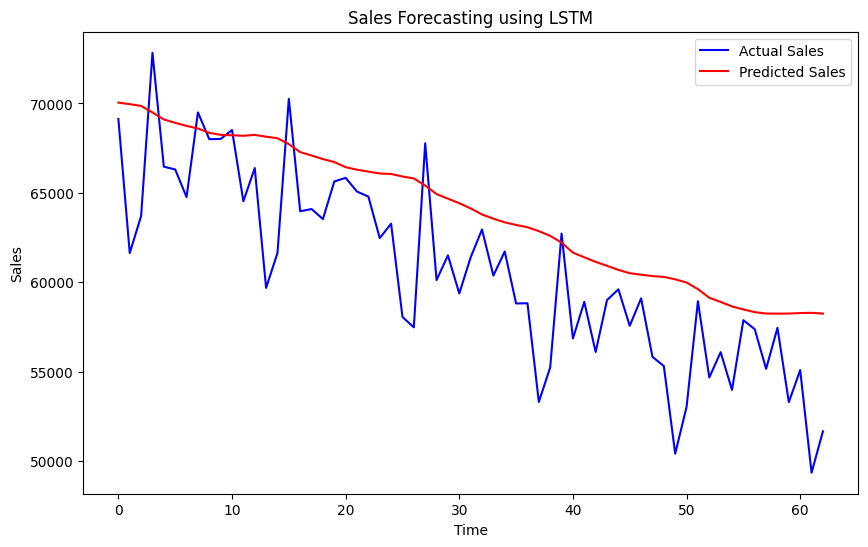

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
tf.get_logger().setLevel('ERROR')

# Step 1: Import the merged data
merged_data = pd.read_csv('merged_food_market_data.csv')

# Check the first few rows to understand the structure of the data
print(merged_data.head())

# Step 2: Handle missing values (if any)
# You can drop rows with missing values or fill them with a specific value
merged_data.dropna(inplace=True)  # Remove missing values, or you can use fillna() for filling

# Step 3: If necessary, create a 'Date' column if not already present
# Assuming 'Year' and 'Month' columns exist, we create a 'Date' column
if 'Date' not in merged_data.columns:
    merged_data['Date'] = pd.to_datetime(merged_data['Month'] + ' ' + merged_data['Year'].astype(str))

# Step 4: Select the column to predict (you can replace with your target column name)
column_to_predict = 'Total food sales million nominal U.S. dollars with taxes and tips'  # Replace with your column name

# Ensure that the column exists
if column_to_predict not in merged_data.columns:
    raise KeyError(f"The column '{column_to_predict}' is not in the dataset!")

# Select only the target column for prediction
data = merged_data[[column_to_predict]]

# Step 5: Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 6: Create the dataset for LSTM
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare data for training and testing
time_step = 12  # Number of time steps (months in this case)
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D as required by LSTM [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the LSTM model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 10: Make predictions using the model
predictions = model.predict(X_test)

# Step 11: Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 12: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Sales')
plt.plot(predictions, color='red', label='Predicted Sales')
plt.title('Sales Forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [1]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')


2025-02-22 14:38:23.640564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 14:38:23.688934: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 14:38:23.689599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-22 14:38:24.522140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 645.6 kB/s eta 0:00:00m eta 0:00:010:00:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 917.3 kB/s eta 0:00:001m1.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 670.6 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 688.3 kB/s eta 0:00:001m702.7 kB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: keras
    Fo